<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/trip_ay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving trip.csv to trip.csv


In [2]:
import pandas as pd #데이터를 불러옴
data = pd.read_csv('trip.csv')

초기 탐색 및 결측치 처리

In [3]:
print(data.head(10)) #10개 데이터 확인

    passenger_name    tpep_pickup_datetime   tpep_dropoff_datetime  \
0     Pamela Duffy   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1  Michelle Foster   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2       Tina Combs   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3      Anthony Ray   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
4  Brianna Johnson  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   
5     Justin Smith   03/25/2017 8:34:11 PM   03/25/2017 8:42:11 PM   
6     Tonya Moreno   05/03/2017 7:04:09 PM   05/03/2017 8:03:47 PM   
7     Hannah Foley   08/15/2017 5:41:06 PM   08/15/2017 6:03:05 PM   
8    Katie Whitney   02/04/2017 4:17:07 PM   02/04/2017 4:29:14 PM   
9     Amanda Jones   11/10/2017 3:20:29 PM   11/10/2017 3:40:55 PM   

  payment_method  passenger_count  trip_distance  fare_amount  tip_amount  \
0     Debit Card                6           3.34         13.0        2.76   
1     Debit Card                1           1.80         16.0        4.00  

In [4]:
data.describe() #통계적인 요약 확인

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [5]:
data.isna() #널 값 확인

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
22696,False,False,False,False,False,False,False,False,False
22697,False,False,False,False,False,False,False,False,False
22698,False,False,False,False,False,False,False,False,False
22699,False,False,False,False,False,False,False,False,False


In [6]:
data.isna().sum() #결측치 확인,  fare_amount에 3개의 결측치 확인

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


fare_amount에 3개의 결측치 확인




In [7]:
data['fare_amount'].isnull().mean()*100

np.float64(0.013215276860050218)

결측치 비율: 약 1.32 %

단순 삭제하기엔 결측치 비율이 1%를 넘었기 때문에 결과가 왜곡될 수 있음
따라서 중앙값으로 대체를 한다.

In [8]:
median_fare = data['fare_amount'].median()
data['fare_amount'].fillna(median_fare, inplace=True)

/tmp/ipython-input-3882087846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fare_amount'].fillna(median_fare, inplace=True)


In [9]:
data.isnull().sum()
data.describe()
#결측치 없음 확인


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.023543,1.835745,0.312514
std,1.304942,3.653023,13.239261,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


이상치(Outlier) 처리 강화

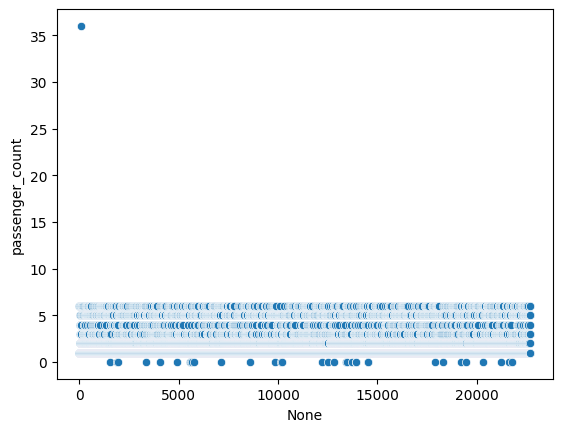

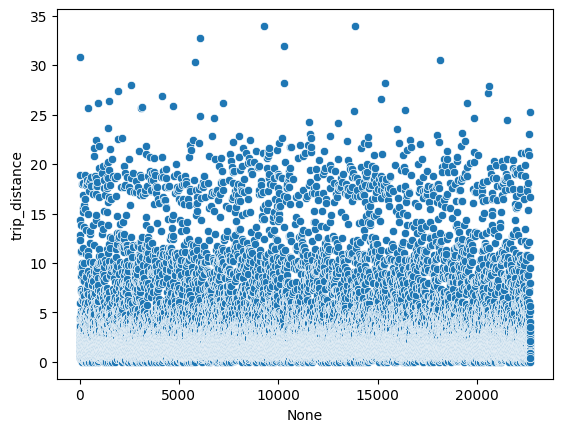

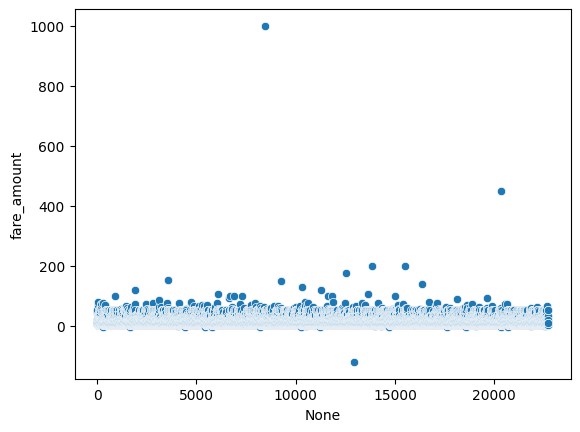

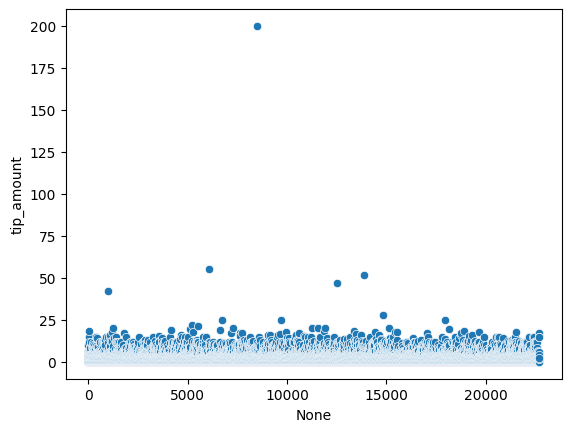

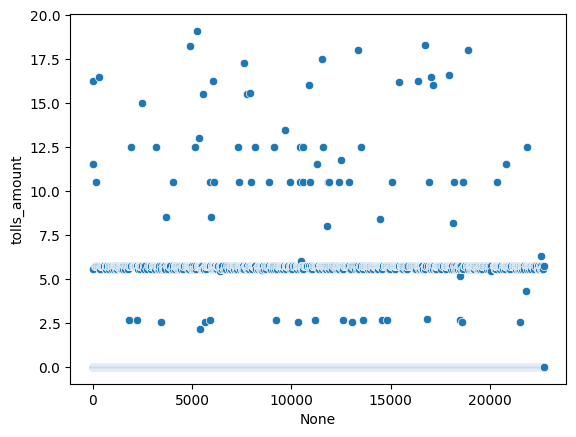

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['passenger_count','trip_distance','fare_amount','tip_amount','tolls_amount']:
    sns.scatterplot(x=data.index, y=data[col])
    plt.show()  # 산점도로 이상값 확인


이상치(Outlier) 처리 강화

In [18]:
# 1. 탑승객 수 (passenger_count): 1명 미만 -> 1, 6명 초과 -> 6 (현실적 최대값 설정)
def passenger_func(x):
    if pd.isna(x): return x
    elif x < 1: return 1
    elif x > 6: return 6
    else: return x

# 2. 요금 (fare_amount): 0 미만 -> 0, 50 초과 -> 50(극단적 고가 제한)
def fare_func(x):
    if pd.isna(x): return x
    elif x < 0: return 0
    elif x > 50: return 50
    else: return x

# 3. 팁 (tip_amount): 0 미만 -> 0, 20 초과 -> 20 (일반적인 팁 상한선 제한)
def tip_func(x):
    if pd.isna(x): return x
    elif x < 0: return 0
    elif x > 20: return 20
    else: return x

data['passenger_count'] = data['passenger_count'].apply(passenger_func)
data['fare_amount'] = data['fare_amount'].apply(fare_func)
data['tip_amount'] = data['tip_amount'].apply(tip_func)

In [19]:
print("\n5. passenger_count, fare_amount, tip_amount 이상치 처리 완료 (Capping).")
print(data[['passenger_count', 'fare_amount', 'tip_amount']].describe())


5. passenger_count, fare_amount, tip_amount 이상치 처리 완료 (Capping).
       passenger_count   fare_amount    tip_amount
count     22701.000000  22701.000000  22701.000000
mean          1.643716     12.781640      1.821508
std           1.283895     10.086828      2.395573
min           1.000000      0.000000      0.000000
25%           1.000000      6.500000      0.000000
50%           1.000000      9.500000      1.350000
75%           2.000000     14.500000      2.450000
max           6.000000     50.000000     20.000000


trip_distance 이상치 제거 (IQR 기준)

In [20]:
# 상위 극단 이상치(Outlier) 제거: IQR (사분위 범위)를 사용하여 15마일 초과를 제거한다.
Q1 = data['trip_distance'].quantile(0.25)
Q3 = data['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# 거리가 너무 긴 경우(상위 IQR 이상)는 제거하고, 15마일 초과 데이터도 함께 제거한다.
distance_upper_limit = 15.0  # 임의로 15마일 초과 데이터를 극단적 이상치로 간주하고 제거한다.

# 이상치 조건: (1) 0마일 초과 (2) 15마일 초과
data = data[
    (data['trip_distance'] <= distance_upper_limit) |
    (data['trip_distance'] == 0) # 0마일은 짧은 거리로 인정한다.
].copy()

print("\n6. trip_distance 이상치 제거 후 데이터 크기:", data.shape)
print(data['trip_distance'].describe())



6. trip_distance 이상치 제거 후 데이터 크기: (22077, 9)
count    22077.000000
mean         2.466052
std          2.494955
min          0.000000
25%          0.970000
50%          1.600000
75%          2.830000
max         15.000000
Name: trip_distance, dtype: float64


날짜/시간 변수 변환 및 주행 시간 계산

In [21]:
# Object 타입인 시간 변수를 datetime 타입으로 변환한다.
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [22]:
# 주행 시간(분 단위) 파생 변수 생성
data['trip_duration_min'] = (
    data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
).dt.total_seconds() / 60

In [24]:
#파생 변수 생성 완료
print(data['trip_duration_min'].describe())

count    22077.000000
mean        16.008082
std         61.082595
min        -16.983333
25%          6.533333
50%         10.900000
75%         17.550000
max       1439.550000
Name: trip_duration_min, dtype: float64


주행 시간 논리적 오류 처리 및 범위 제한

In [27]:
data = data[data['trip_duration_min'] > 0].copy()

# 0분 이하인 데이터 제거

In [29]:
# 주행 시간 이상치 처리: 2시간(120분) 초과 데이터는 장거리 운행이나 대기시간 포함으로 간주하고,
# 일반적인 택시 운행 범위(120분)로 상한선(Capping)을 설정한다.
data['trip_duration_min'] = data['trip_duration_min'].apply(lambda x: 120 if x > 120 else x)


print(data['trip_duration_min'].describe())


count    22050.000000
mean        13.604745
std         10.914378
min          0.016667
25%          6.550000
50%         10.916667
75%         17.550000
max        120.000000
Name: trip_duration_min, dtype: float64


In [31]:
#요일 파생 변수 생성 (시각화 목적)

data['day_of_week'] = data['tpep_pickup_datetime'].dt.day_name()
# 요일 순서 지정
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [33]:
## 'Credit Card'와 'Debit Card'를 'Card'로 통일한다.

data['payment_method'] = data['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22050 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22050 non-null  object        
 1   tpep_pickup_datetime   22050 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22050 non-null  datetime64[ns]
 3   payment_method         22050 non-null  object        
 4   passenger_count        22050 non-null  int64         
 5   trip_distance          22050 non-null  float64       
 6   fare_amount            22050 non-null  float64       
 7   tip_amount             22050 non-null  float64       
 8   tolls_amount           22050 non-null  float64       
 9   trip_duration_min      22050 non-null  float64       
 10  day_of_week            22050 non-null  object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(3)
memory usage: 2.0+ MB


In [35]:
print(data[['trip_duration_min', 'trip_distance', 'fare_amount', 'tip_amount']].corr())
# 상관관계 해석: trip_distance와 fare_amount가 0.91로 가장 강한 양의 상관관계를 보인다.

                   trip_duration_min  trip_distance  fare_amount  tip_amount
trip_duration_min           1.000000       0.684250     0.786232    0.420573
trip_distance               0.684250       1.000000     0.900996    0.518865
fare_amount                 0.786232       0.900996     1.000000    0.563931
tip_amount                  0.420573       0.518865     0.563931    1.000000


다양한 시각화 (Matplotlib/Seaborn)

주요 변수의 이상치 처리 전/후 분포 확인 (히스토그램)

In [36]:
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 0, 'Fare Amount ($)')

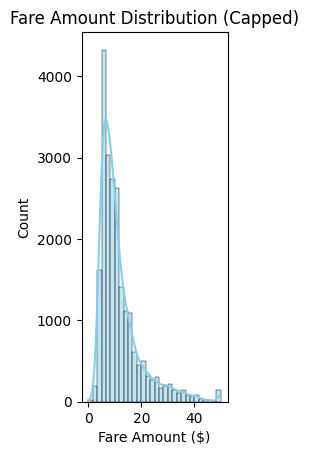

In [37]:
# (1) 요금 분포
plt.subplot(1, 3, 1)
sns.histplot(data['fare_amount'], bins=30, kde=True, color='skyblue')
plt.title('Fare Amount Distribution (Capped)')
plt.xlabel('Fare Amount ($)')

Text(0.5, 0, 'Tip Amount ($)')

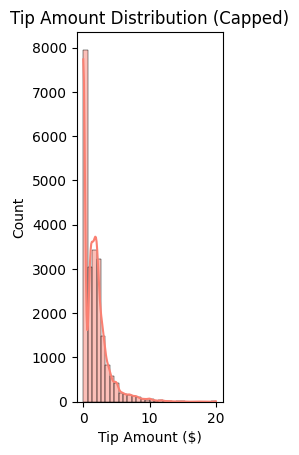

In [38]:
# (2) 팁 분포
plt.subplot(1, 3, 2)
sns.histplot(data['tip_amount'], bins=30, kde=True, color='salmon')
plt.title('Tip Amount Distribution (Capped)')
plt.xlabel('Tip Amount ($)')

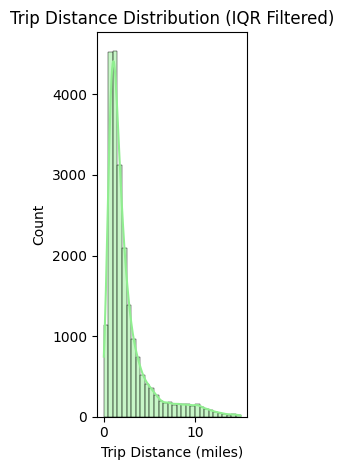

In [39]:

# (3) 거리 분포
plt.subplot(1, 3, 3)
sns.histplot(data['trip_distance'], bins=30, kde=True, color='lightgreen')
plt.title('Trip Distance Distribution (IQR Filtered)')
plt.xlabel('Trip Distance (miles)')

plt.tight_layout()
plt.show()

거리-요금 관계 시각화 (산점도 + 추세선)

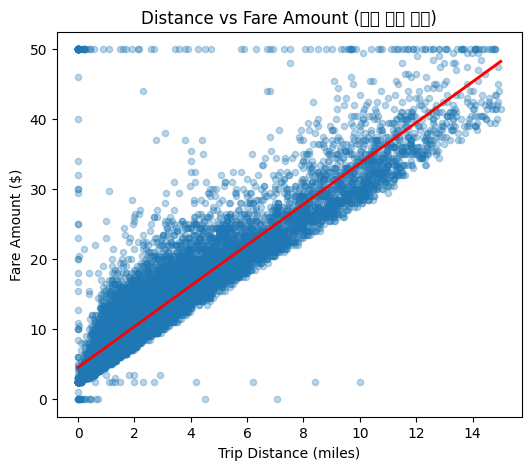

In [41]:
plt.figure(figsize=(6, 5))
sns.regplot(data=data, x='trip_distance', y='fare_amount',
            scatter_kws={'alpha': 0.3, 's': 20}, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Distance vs Fare Amount (선형 관계 확인)')
plt.show()

# 해석: 이상치 제거 후 데이터가 깨끗해져 강력한 선형 관계가 명확하게 보인다.

결제 방식별 평균 팁 비교 (막대 그래프)

/tmp/ipython-input-2835073310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54017 (\N{HANGUL SYLLABLE TIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.c

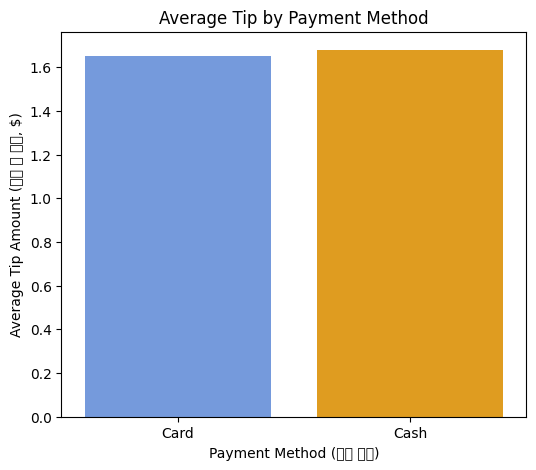

In [42]:
plt.figure(figsize=(6, 5))
sns.barplot(
    data=data,
    x='payment_method',
    y='tip_amount',
    errorbar=None,
    palette=['cornflowerblue', 'orange']
)
plt.xlabel('Payment Method (결제 방식)')
plt.ylabel('Average Tip Amount (평균 팁 금액, $)')
plt.title('Average Tip by Payment Method')
plt.show()
# 해석: 카드 결제(Card)가 현금 결제(Cash)보다 평균 팁 금액이 훨씬 높다.

일별 평균 요금 비교 (막대 그래프)

/tmp/ipython-input-2419751836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.ca

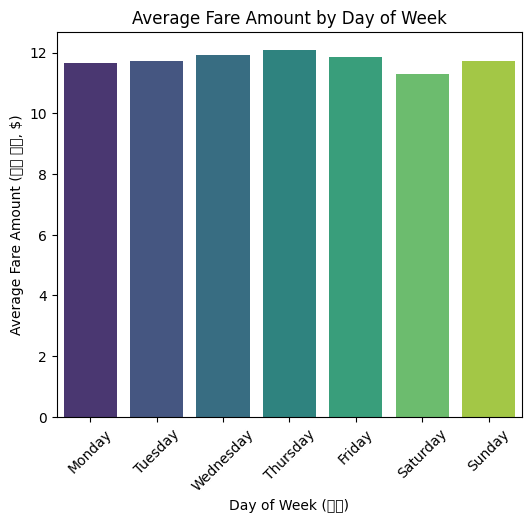

In [43]:
plt.figure(figsize=(6, 5))
sns.barplot(
    data=data,
    x='day_of_week',
    y='fare_amount',
    errorbar=None,
    order=day_order,
    palette='viridis'
)
plt.xlabel('Day of Week (요일)')
plt.ylabel('Average Fare Amount (평균 요금, $)')
plt.title('Average Fare Amount by Day of Week')
plt.xticks(rotation=45) # x축 라벨 회전
plt.show()
# 해석: 일반적으로 평일이나 주말에 따라 요금이 미세하게 변동하는 경향을 확인할 수 있다.


주행 시간 vs 요금 관계 시각화 (산점도)

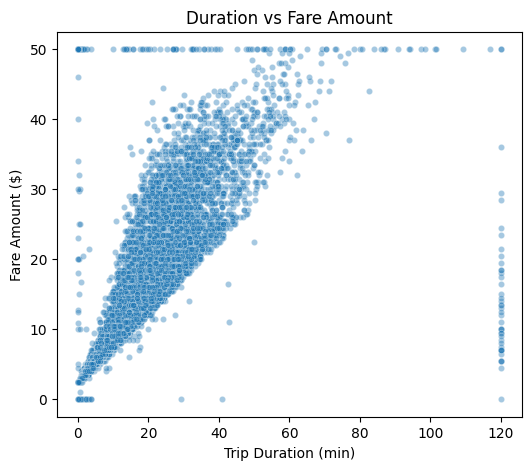

In [44]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=data, x='trip_duration_min', y='fare_amount', alpha=0.4, s=20)
plt.xlabel('Trip Duration (min)')
plt.ylabel('Fare Amount ($)')
plt.title('Duration vs Fare Amount')
plt.show()
# 해석: 시간보다는 거리가 요금에 더 직접적인 영향을 미치지만, 일정 시간(예: 20분 이상)을 초과하면 요금이 높아지는 경향도 보인다.


In [45]:
print(data.head())

    passenger_name tpep_pickup_datetime tpep_dropoff_datetime payment_method  \
0     Pamela Duffy  2017-03-25 08:55:43   2017-03-25 09:09:47           Card   
1  Michelle Foster  2017-04-11 14:53:28   2017-04-11 15:19:58           Card   
2       Tina Combs  2017-12-15 07:26:56   2017-12-15 07:34:08           Card   
3      Anthony Ray  2017-05-07 13:17:59   2017-05-07 13:48:14           Cash   
4  Brianna Johnson  2017-04-15 23:32:20   2017-04-15 23:49:03           Card   

   passenger_count  trip_distance  fare_amount  tip_amount  tolls_amount  \
0                6           3.34         13.0        2.76           0.0   
1                1           1.80         16.0        4.00           0.0   
2                1           1.00          6.5        1.45           0.0   
3                1           3.70         20.5        6.39           0.0   
4                1           4.37         16.5        0.00           0.0   

   trip_duration_min day_of_week  
0          14.066667    Sat